In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Viterbi Algorithm

\begin{equation}
 \Pi^*= argmax_{} P(X ,\Pi)
\end{equation}

In [2]:
def viterbi(x, transmat, emissions):
    v_seq = np.zeros((len(x), len(transmat)))
    states = np.zeros((len(x), len(transmat)))
    best_states = np.zeros(len(x),  dtype=int)
    for i in range(len(v_seq)):
        if i == 0:
            v_seq[0] = (1/len(transmat)) * emissions[:,x[i]]
            v_seq[0] = np.log(v_seq[0])
            states[0] = np.zeros(len(transmat))
            continue
        p = v_seq[i-1] + np.log(transmat.T)
        states[i] =  np.argmax(p, axis=1)
        v_seq[i] =   np.log(emissions[:,x[i]]) + np.amax(p, axis = 1)
        
    best_states[-1] = np.argmax(v_seq[-1])
    
    for i in reversed(range(1, len(x))):
        best_states[i-1] = states[i][best_states[i]]
        
    return v_seq, states, best_states
    

# Forward Algorithm

\begin{equation}
\label{eq:bayes}
f_{(k)}(i) =  P(X_{1}....X_{i} |\Pi_{i} = k)
\end{equation}

In [3]:
def forward(x, transmat, emissions):
    f_seq = np.zeros((len(x), len(transmat)))
    s_seq = np.zeros((len(x), 1))
    a = 10**len(f_seq)
    for i in range(len(f_seq)):
        if i == 0:
            f_seq[i] =  emissions[:,x[i]] * (1/len(transmat)) *a
            continue
        f_seq[i] = emissions[:,x[i]] * np.matmul(f_seq[i-1], transmat)
        
    P = (1/len(transmat))*sum(f_seq[-1]) 
        
    return (f_seq, P, a)

# Backward Algorithm

\begin{equation}
\label{eq:bayes}
B_{(k)}(i) =  P(X_{i+1}....X_{L} |\Pi_{i} = k)
\end{equation}

In [4]:
def backward(x, transmat, emissions):
    b_seq = np.zeros((len(x), len(transmat)))
    a = 10**len(b_seq)
    for i in reversed(range(len(b_seq))):
        if i == len(b_seq) -1:
            b_seq[i] =  (1/len(transmat))*np.ones(len(transmat))*a
            continue
        b_seq[i] = np.matmul(emissions[:,x[i+1]] * b_seq[i+1],  transmat.T)
    
    P = (1/len(transmat))*sum(emissions[:,x[0]] * b_seq[0])
    return (b_seq, P, a)

# Let's predict CpG islands

In [5]:
seq = 'AGAACTGCTGACTGATAGATCGCGCGCCGCGCGCGCGGCATGCATCGATGCATGCGCAACTCGAATCGATTGCGAAGACAATTATGCAATGCGCAGCAGCATTTATTACTACACATACGTGCATGCGCGCGCTATA'
seq_dic = {'A': 0, 'T': 1, 'G':2, 'C':3}
x_seq = np.array([seq_dic[n] for n in seq])

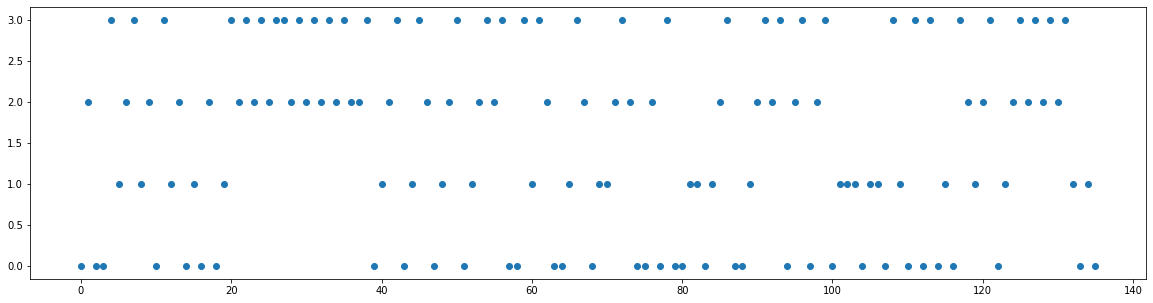

In [6]:
plt.figure(1, (20, 5))
plt.scatter(range(len(x_seq)), x_seq)

In [7]:
transmat = np.array([[0.9, 0.1],[0.1, 0.9]])
transmat

array([[0.9, 0.1],
       [0.1, 0.9]])

In [8]:
emissions = np.ones((2, 4))
emissions[0][:] = 0.25
emissions[1][:2] = 0.1
emissions[1][2:] = 0.4
emissions

array([[0.25, 0.25, 0.25, 0.25],
       [0.1 , 0.1 , 0.4 , 0.4 ]])

In [9]:
v, states, path = viterbi(x_seq, transmat, emissions)


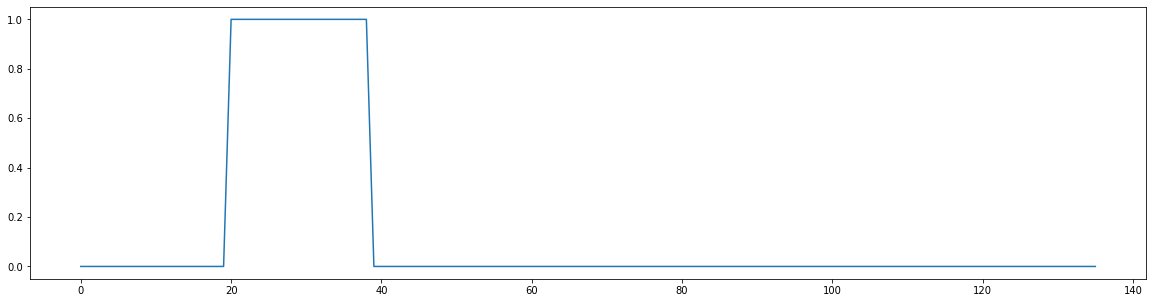

In [10]:
plt.figure(1, (20, 5))
plt.plot(path)

# Let's plot posterior probabilities

\begin{equation}
\label{eq:bayes}
P(\pi(i) = k|\textbf{X}) =  \frac{P(X_{1}....X_{i} |\Pi_{i} = k) P(X_{i+1}....X_{L} |\Pi_{i} = k)}{P(\textbf{X})} 
\end{equation}

## Which is just:

\begin{equation}
\label{eq:bayes}
P(\pi(i) = k|\textbf{X}) =  \frac{f_{(k)}(i) B_{(k)}(i)}{P(\textbf{X})} 
\end{equation}

In [11]:
f, P1, a1 = forward(x_seq, transmat, emissions)
b, P2, a2 = backward(x_seq, transmat, emissions)

Text(0.5, 1.0, 'Probability of not CpG island')

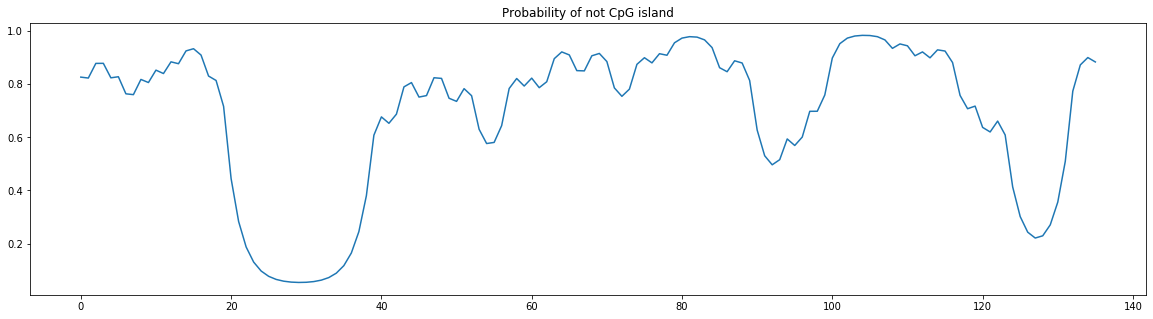

In [12]:
plt.figure(1, (20, 5))
plt.plot(f[:, 0]*b[:, 0]/(P1*a1))
plt.title('Probability of not CpG island')

Text(0.5, 1.0, 'Probability of CpG island')

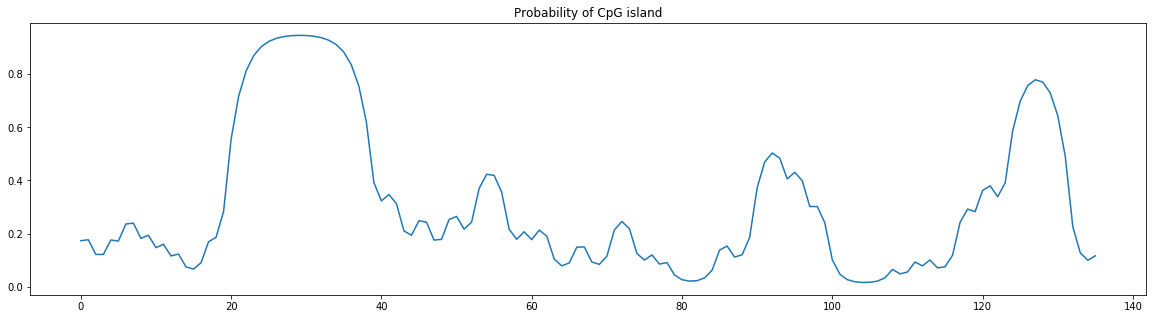

In [13]:
plt.figure(1, (20, 5))
plt.plot(f[:, 1]*b[:, 1]/(P1*a1))
plt.title('Probability of CpG island')

## Putting all together

Text(0.5, 1.0, 'Probability of CpG island')

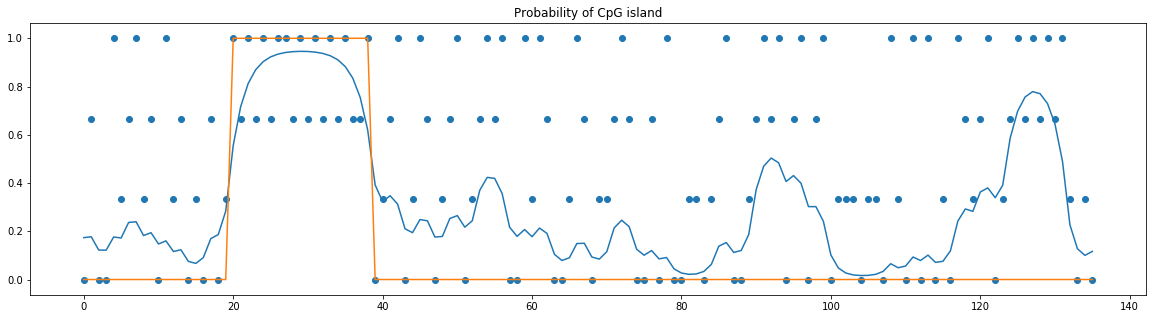

In [14]:
plt.figure(1, (20, 5))
plt.plot(f[:, 1]*b[:, 1]/(P1*a1))
plt.plot(path)
plt.scatter(range(len(x_seq)), x_seq/3)
plt.title('Probability of CpG island')